# Comparing Jesse's previous output to new program output

In [314]:
import random as rand
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [315]:
def plot_spec(SPECTRA, COLOR):
    plt.vlines(SPECTRA.columns, np.repeat(0, len(SPECTRA.columns)), SPECTRA, colors=COLOR)

In [316]:
def plot_line(v, m):
    plt.hlines(y=0.7,xmin=0,xmax=m,colors='red')

In [317]:
jesse_df = pd.read_csv('Data/MSPLIToutput.txt', sep='\t')
caleb_df = pd.read_csv('Data/fullOutput.csv')

jesse_df['ID'] = list(zip(jesse_df['Scan#'].tolist(),jesse_df['Peptide'].tolist()))
jesse_df = jesse_df.loc[:, jesse_df.columns.intersection(['ID','cosine'])]
jesse_dict = jesse_df.set_index('ID')['cosine'].to_dict()

caleb_df['ID'] = list(zip(caleb_df['scan#'].tolist(),caleb_df['peptide'].tolist()))
caleb_df = caleb_df.loc[:, caleb_df.columns.intersection(['ID','cosine'])]
caleb_df_high = caleb_df.drop(caleb_df[caleb_df['cosine'] < 0.7].index) 
caleb_df_low = caleb_df.drop(caleb_df[caleb_df['cosine'] >= 0.7].index) 

caleb_dict_high = caleb_df_high.set_index('ID')['cosine'].to_dict()
caleb_dict_low = caleb_df_low.set_index('ID')['cosine'].to_dict()

In [318]:
len(jesse_dict.keys())

7077

In [319]:
len(caleb_dict_high.keys())

30356

In [320]:
len(caleb_dict_low.keys())

39553

## Intersect between Jesse's data and Caleb's data (0.7 and higher)

In [321]:
intersection = sorted(list(set(jesse_dict.keys()) & set(caleb_dict_high.keys())))
len(intersection)

4713

In [322]:
jesse_intersect = pd.DataFrame([[jesse_dict[k] for k in intersection]])
caleb_intersect = pd.DataFrame([[caleb_dict_high[k] for k in intersection]])
diff_intersect = pd.DataFrame([[abs(caleb_dict_high[k]-jesse_dict[k]) for k in intersection]])
compare = pd.DataFrame([[caleb_dict_high[k] for k in intersection],[jesse_dict[k] for k in intersection],intersection])
compare

0                   1                  2  \
0            0.951677            0.964447           0.975993   
1            0.813959            0.883383           0.898262   
2  (159, GSGTAEVELKK)  (160, GSGTAEVELKK)  (165, SIGVSNFNHR)   

                   3                  4                  5                  6  \
0           0.977169           0.983398           0.929657           0.952497   
1           0.901283           0.868973           0.820805           0.878095   
2  (166, SIGVSNFNHR)  (168, LLLQVQHASK)  (169, DPQALSEHLK)  (169, LLLQVQHASK)   

                    7                   8                   9  \
0             0.98091            0.979463            0.966251   
1            0.771313            0.797554            0.772866   
2  (176, FGLSVGHHLGK)  (205, VLQSFTVDSSK)  (206, VLQSFTVDSSK)   

                   10                   11                   12  \
0             0.99436             0.986542             0.973311   
1            0.878957             0.831153             0.912068   
2  (242, AFVDFLSDEIK)  (242, VTVLFAGQHIAK)  (250, VTVLFAGQHISK)   

                      13                   14                   15  \
0               0.980744             0.966665              0.96557   
1               0.897018               0.8598             0.907448   
2  (258, VLQATVVAVGSGSK)  (260, SLDMDSIIAEVK)  (261, SLDMDSIIAEVK)   

                      16                   17                   18  \
0               0.980395              0.97631             0.967263   
1               0.873789             0.912727             0.909876   
2  (270, GAVDGGLSIPHSTK)  (277, DSYVGDEAQSKR)  (278, DSYVGDEAQSKR)   

                     19                   20                     21  \
0              0.981576              0.95124                0.97283   
1              0.778276             0.793627               0.749697   
2  (281, VGGTSDVEVNEKK)  (285, LLEMILNKPGLK)  (286, ATIAGGGVIPHIHK)   

                    22                  23                    24  \
0             0.955486            0.989329              0.955638   
1             0.826618            0.910292              0.890428   
2  (288, VTLTSEEEARLK)  (291, TLEEDEEELFK)  (293, DLDVAILVGSMPR)   

                     25                     26                    27  \
0              0.974406               0.942714              0.947785   
1              0.875795                0.75402              0.752518   
2  (294, GVDEATIIDILTK)  (305, ILPTLEAVAALGNK)  (314, GTIEILSDVQLIK)   

                      28                    29                     30  \
0               0.977446              0.955756               0.988085   
1               0.866553               0.79136               0.840172   
2  (314, GVMLAVDAVIAELK)  (315, GTIEILSDVQLIK)  (315, GVMLAVDAVIAELK)   

                     31                    32                    33  \
0              0.979926              0.926674              0.971563   
1              0.877809              0.880798              0.790731   
2  (317, ANLPQSFQVDTSK)  (318, ANLPQSFQVDTSK)  (323, EGIPALDNFLDKL)   

                    34                    35                    36  \
0             0.940068              0.966645              0.962736   
1             0.805014               0.89304               0.90713   
2  (329, TPELNLDQFHDK)  (329, TVLIMELINNVAK)  (330, ILTFDQLALDSPK)   

                     37                    38                    39  \
0              0.949197              0.966134              0.919581   
1              0.867417              0.925257              0.911614   
2  (331, GVAINMVTEEDKR)  (331, ILTFDQLALDSPK)  (331, IYVDDGLISLQVK)   

                     40                    41                     42  \
0              0.971822              0.993829               0.978079   
1              0.926171              0.808427               0.884635   
2  (332, IYVDDGLISLQVK)  (334, GTQGVVTNFEIFR)  (340, VDEAVAVLQAHQAK)   

                     43                    44                    4

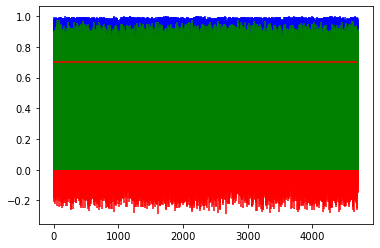

In [323]:
plot_spec(caleb_intersect, 'blue')
plot_spec(jesse_intersect, 'green')
plot_spec(-diff_intersect, 'red')
plot_line(0.7,len(intersection))

### first 150 (to improve visuals)

In [324]:
jesse_intersect = jesse_intersect.iloc[:,:150]
caleb_intersect = caleb_intersect.iloc[:,:150]
diff_intersect = diff_intersect.iloc[:,:150]

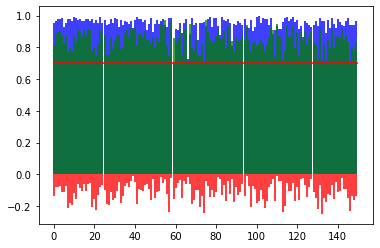

In [325]:
plot_spec(caleb_intersect, 'blue')
plot_spec(jesse_intersect, 'green')
plot_spec(-diff_intersect, 'red')
plot_line(0.7,150)

## Intersect between Jesse's data and Caleb's data (less than 0.7)

In [326]:
intersection = sorted(list(set(jesse_dict.keys()) & set(caleb_dict_low.keys())))
len(intersection)

145

In [327]:
jesse_intersect = pd.DataFrame([[jesse_dict[k] for k in intersection]])
caleb_intersect = pd.DataFrame([[caleb_dict_low[k] for k in intersection]])
diff_intersect = pd.DataFrame([[abs(caleb_dict_low[k]-jesse_dict[k]) for k in intersection]])
compare = pd.DataFrame([[caleb_dict_low[k] for k in intersection],[jesse_dict[k] for k in intersection],intersection])
compare

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144
0,0.630252,0.630334,0.684131,0.593427,0.545783,0.544748,0.418279,0.686067,0.622625,0.542777,0.670619,0.631679,0.611561,0.694542,0.557471,0.519683,0.558986,0.670642,0.633382,0.631276,0.287112,0.698227,0.676393,0.254274,0.451642,0.671928,0.670114,0.688811,0.629541,0.682162,0.567524,0.641801,0.659396,0.661219,0.654741,0.677205,0.68151,0.514478,0.638047,0.685119,0.47491,0.512482,0.372423,0.677347,0.617547,0.641368,0.695746,0.550825,0.651867,0.688128,0.633648,0.663544,0.666568,0.557682,0.625373,0.675921,0.659885,0.668261,0.46189,0.586471,0.663962,0.69927,0.646903,0.690212,0.45063,0.561686,0.670983,0.680995,0.6926,0.678352,0.362043,0.565112,0.557028,0.351746,0.408752,0.561229,0.615396,0.563956,0.53491,0.470028,0.669418,0.68006,0.683916,0.607235,0.695454,0.587668,0.684285,0.672538,0.689389,0.652606,0.572889,0.568205,0.653196,0.684371,0.649878,0.495659,0.54071,0.604227,0.556971,0.54666,0.568103,0.67899,0.695065,0.30481,0.63073,0.660378,0.50721,0.571161,0.691513,0.6146,0.585667,0.618049,0.607645,0.6522,0.680377,0.615917,0.650852,0.64722,0.425393,0.621695,0.527669,0.687429,0.430039,0.483585,0.590462,0.576334,0.594108,0.678396,0.473862,0.457801,0.591017,0.645578,0.390767,0.430907,0.647988,0.411404,0.683438,0.681692,0.692969,0.636156,0.567145,0.626319,0.618238,0.379394,0.608007
1,0.736163,0.733019,0.746227,0.830695,0.758422,0.721725,0.710111,0.769417,0.723526,0.711555,0.728621,0.721125,0.81285,0.751368,0.750945,0.707936,0.7668,0.747424,0.745821,0.731931,0.717555,0.771667,0.758341,0.785293,0.706886,0.736209,0.737368,0.764186,0.719021,0.787595,0.709542,0.716633,0.79112,0.778083,0.725693,0.810672,0.730606,0.743558,0.727429,0.76106,0.761905,0.742463,0.724681,0.763468,0.753075,0.711443,0.764457,0.729325,0.832865,0.748668,0.744008,0.715418,0.741736,0.723234,0.792197,0.73657,0.772557,0.705147,0.735114,0.746116,0.749802,0.773698,0.724879,0.743434,0.741203,0.772264,0.835672,0.705805,0.750219,0.726048,0.717857,0.766624,0.713427,0.731488,0.736323,0.84282,0.728879,0.717352,0.722697,0.791317,0.84167,0.853275,0.733024,0.757196,0.820875,0.753968,0.715176,0.742919,0.816459,0.856722,0.779345,0.792149,0.75878,0.766608,0.755418,0.799125,0.818947,0.705616,0.76679,0.754626,0.72356,0.713015,0.730236,0.744402,0.882753,0.711696,0.709187,0.714271,0.722597,0.723426,0.778706,0.707733,0.724569,0.76537,0.806432,0.720254,0.705671,0.802722,0.735097,0.775459,0.75382,0.764236,0.705741,0.725178,0.733324,0.722253,0.709352,0.775352,0.767691,0.748275,0.766908,0.71752,0.742776,0.714542,0.748904,0.748111,0.776488,0.78324,0.745628,0.720248,0.729605,0.8018,0.820396,0.752242,0.711897
2,"(603, VHAIPLR)","(609, NNTVTPGGKPNK)","(648, EAILAIHK)","(705, VGPGPALMLR)","(708, SAVTTVVNPK)","(736, LVALAVIDEK)","(737, ATVNLLGEEK)","(751, SALSGHLETVILGLLK)","(754, IINEPTAAAIAYGLDK)","(767, SLNILTAFQK)","(771, VIDPATATSVDLRDIK)","(775, RYDDPEVQK)","(785, AEAESMYQIK)","(804, ITVTSEVPFSK)","(821, AGNLGGGVVTIER)","(821, VQTLSNQPLLK)","(822, AGNLGGGVVTIER)","(830, ISMPDIDLNLK)","(833, LWDLTTGTTTR)","(849, LGVQVVITDPEK)","(853, GVAINMVTEEDK)","(929, DTNGSQFFITTVK)","(929, HVFGESDELIGQK)","(983, NISFTVWDVGGQDK)","(1244, VLVNDAQK)","(1258, FSHEEIAMATVTALRR)","(1259, FSHEEIAMATVTALRR)","(1278, VAALQNLVK)","(1284, ILEFFGLK)","(1296, ENLLDFIK)","(1296, LQGEFQLR)","(1307, EAGGGGVGGPGAK)","(1308, LTLSALVDGK)","(1330, SYSPYDMLESIRK)","(1338, ALQFLEEVK)","(1380, VDSLLENLEK)","(1385, AEAESMYQIK)","(1386, IHFPLATYAPVISAEK)","(1447, DLLHPSPEEEK)","(1471, YILGNPLTPGVTQGPQIDK)","(1803, VGVNGFGR)","(1808, ILAEGGGAK)","(1837, LLVGVDEK)","(1848, ADDGRP

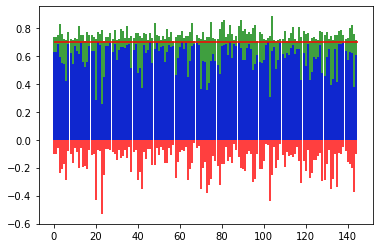

In [328]:
plot_spec(jesse_intersect, 'green')
plot_spec(caleb_intersect, 'blue')
plot_spec(-diff_intersect, 'red')
plot_line(0.7,len(intersection))

## Difference - Jesse's Data (no match in Caleb's 0.7 and higher data)

In [329]:
diff = sorted(list(set(jesse_dict.keys()) - set(caleb_dict_high.keys())))
print(len(diff))

2364


In [330]:
jesse_difference = pd.DataFrame([[jesse_dict[k] for k in diff],diff])
jesse_difference

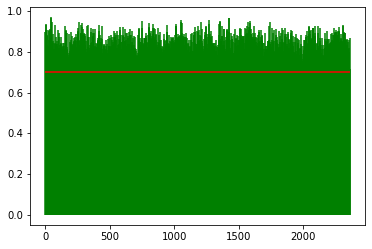

In [331]:
plot_spec(jesse_difference, 'green')
plot_line(0.7,len(diff))

### first 150 (to improve visuals)

In [332]:
jesse_diff_150 = jesse_difference.iloc[:,:150]

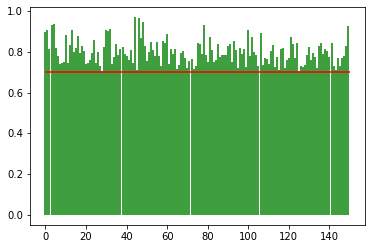

In [333]:
plot_spec(jesse_diff_150, 'green')
plot_line(0.7,150)

## Difference - Caleb's 0.7 or higher Data (no match in Jesse's)

In [334]:
diff = sorted(list(set(caleb_dict_high.keys()) - set(jesse_dict.keys())))
print(len(diff))

25643


In [335]:
caleb_difference = pd.DataFrame([[caleb_dict_high[k] for k in diff],diff])
caleb_difference

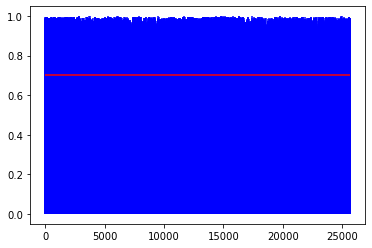

In [336]:
plot_spec(caleb_difference, 'blue')
plot_line(0.7,len(diff))

### first 150 (to improve visuals)

In [337]:
caleb_diff_150 = caleb_difference.iloc[:,:150]

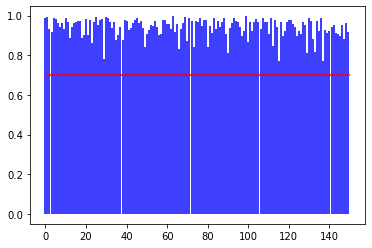

In [338]:
plot_spec(caleb_diff_150, 'blue')
plot_line(0.7,150)